In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
#Again, since no change was done in dataAnalysis, we use the same data

data = pd.read_csv('data.csv')
df = data.drop(['Bankrupt?'], axis =1)
x = pd.DataFrame(df)
y = pd.DataFrame(data['Bankrupt?'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=2023)

In [3]:
corr = pd.concat([x_train, y_train], axis = 1)
corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4773 entries, 1257 to 4951
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  4773 non-null   float64
 1    ROA(A) before interest and % after tax                   4773 non-null   float64
 2    ROA(B) before interest and depreciation after tax        4773 non-null   float64
 3    Operating Gross Margin                                   4773 non-null   float64
 4    Realized Sales Gross Margin                              4773 non-null   float64
 5    Operating Profit Rate                                    4773 non-null   float64
 6    Pre-tax net Interest Rate                                4773 non-null   float64
 7    After-tax net Interest Rate                              4773 non-null   float64
 8    Non-industry i

In [4]:
data_corr = corr.corr()[["Bankrupt?"]]
data_corr = data_corr[abs(data_corr["Bankrupt?"]) > 0.2].sort_values("Bankrupt?", ascending = False)
print(data_corr)

                                                    Bankrupt?
Bankrupt?                                            1.000000
 Debt ratio %                                        0.246080
 Borrowing dependency                                0.237718
 Liability to Equity                                 0.215869
 Net Income to Stockholder's Equity                 -0.208120
 Persistent EPS in the Last Four Seasons            -0.208900
 ROA(C) before interest and depreciation before...  -0.242889
 Net worth/Assets                                   -0.246080
 ROA(B) before interest and depreciation after tax  -0.252060
 ROA(A) before interest and % after tax             -0.265433
 Net Income to Total Assets                         -0.299238


In [5]:
# Train set
x_train = x_train[[
    " Debt ratio %",
    " Borrowing dependency",
    " Liability to Equity",
    " Net Income to Stockholder's Equity",
    " Persistent EPS in the Last Four Seasons",
    " ROA(C) before interest and depreciation before interest",
    " Net worth/Assets",
    " ROA(B) before interest and depreciation after tax",
    " ROA(A) before interest and % after tax",
    " Net Income to Total Assets"
]]

# Test set
x_test = x_test[[
    " Debt ratio %",
    " Borrowing dependency",
    " Liability to Equity",
    " Net Income to Stockholder's Equity",
    " Persistent EPS in the Last Four Seasons",
    " ROA(C) before interest and depreciation before interest",
    " Net worth/Assets",
    " ROA(B) before interest and depreciation after tax",
    " ROA(A) before interest and % after tax",
    " Net Income to Total Assets"
]]

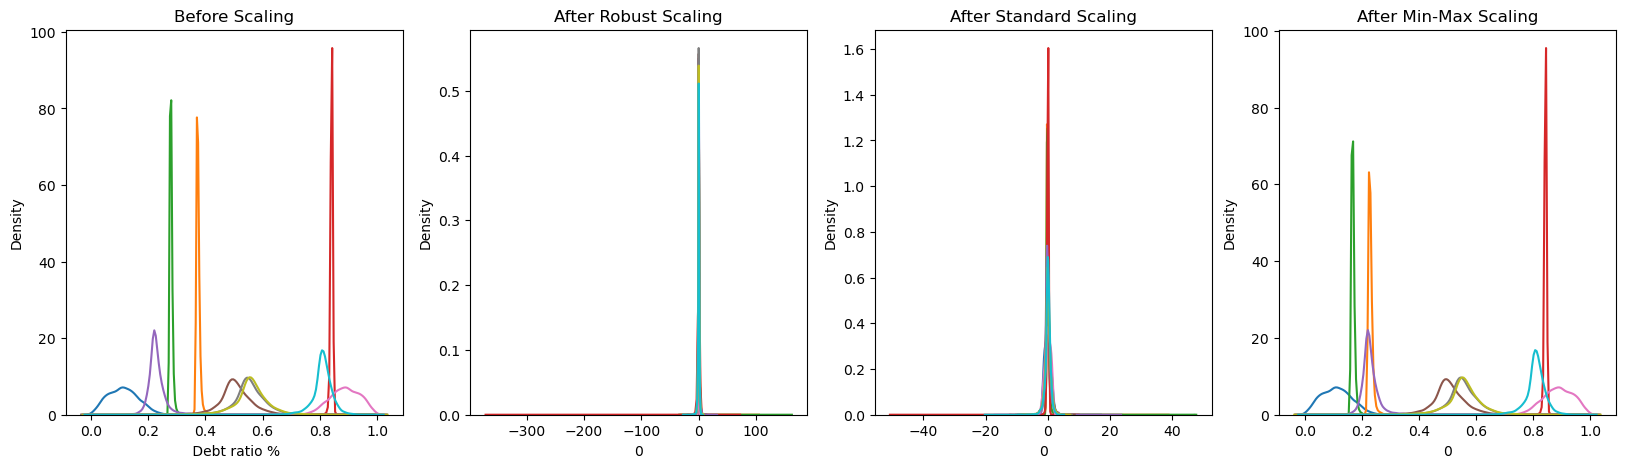

In [6]:
# We will use the X_train set to determine which scaling method to use
# Credits to paymanfara @kaggle
scaler = RobustScaler()
robust_df = scaler.fit_transform(x_train)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(x_train)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x_train)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train[' Debt ratio %'], ax = ax1)
sns.kdeplot(x_train[' Borrowing dependency'], ax = ax1)
sns.kdeplot(x_train[' Liability to Equity'], ax = ax1)
sns.kdeplot(x_train[" Net Income to Stockholder's Equity"], ax = ax1)
sns.kdeplot(x_train[' Persistent EPS in the Last Four Seasons'], ax = ax1)
sns.kdeplot(x_train[' ROA(C) before interest and depreciation before interest'], ax = ax1)
sns.kdeplot(x_train[' Net worth/Assets'], ax = ax1)
sns.kdeplot(x_train[' ROA(B) before interest and depreciation after tax'], ax = ax1)
sns.kdeplot(x_train[' ROA(A) before interest and % after tax'], ax = ax1)
sns.kdeplot(x_train[' Net Income to Total Assets'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[0], ax = ax2)
sns.kdeplot(robust_df[1], ax = ax2)
sns.kdeplot(robust_df[2], ax = ax2)
sns.kdeplot(robust_df[3], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[6], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[9], ax = ax2)

ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[0], ax = ax3)
sns.kdeplot(standard_df[1], ax = ax3)
sns.kdeplot(standard_df[2], ax = ax3)
sns.kdeplot(standard_df[3], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[6], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[9], ax = ax3)

ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[0], ax = ax4)
sns.kdeplot(minmax_df[1], ax = ax4)
sns.kdeplot(minmax_df[2], ax = ax4)
sns.kdeplot(minmax_df[3], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[6], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[9], ax = ax4)

plt.show()

In [7]:
scaler = RobustScaler()
trainnew = scaler.fit_transform(x_train)
testnew = scaler.fit_transform(x_test)

In [8]:
print(data.groupby('Bankrupt?').size())

Bankrupt?
0    6599
1     220
dtype: int64


In [9]:
#First we combine back the train-test split to get a full clean and processed dataset

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
dfnew_x = pd.concat([x_train, x_test], ignore_index=True)


y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
dfnew_y = pd.concat([y_train, y_test], ignore_index=True)

data_new = pd.concat([dfnew_x, dfnew_y], axis=1)

dfy = data_new[['Bankrupt?']]
dfx = data_new.drop('Bankrupt?', axis=1)

smote = SMOTE()
x_SM, y_SM = smote.fit_resample(dfx, dfy)
SMData = pd.concat([x_SM, y_SM], axis=1)
#check count
print(SMData.groupby('Bankrupt?').size())

Bankrupt?
0    6599
1    6599
dtype: int64


,Debt ratio %,Borrowing dependency,Liability to Equity,Net Income to Stockholder's Equity,Persistent EPS in the Last Four Seasons,ROA(C) before interest and depreciation before interest,Net worth/Assets,ROA(B) before interest and depreciation after tax,ROA(A) before interest and % after tax,Net Income to Total Assets,Bankrupt?
Debt ratio %,1.000000,0.311062,0.299815,-0.234097,-0.518695,-0.478387,-1.000000,-0.465698,-0.462475,-0.451779,0.598979
Borrowing dependency,0.311062,1.000000,0.976013,-0.917698,-0.242068,-0.200128,-0.311062,-0.184466,-0.179952,-0.189469,0.190527
Liability to Equity,0.299815,0.976013,1.000000,-0.892722,-0.234842,-0.191309,-0.299815,-0.177974,-0.177244,-0.185354,0.164797
Net Income to Stockholder's Equity,-0.234097,-0.917698,-0.892722,1.000000,0.289814,0.297311,0.234097,0.291691,0.298795,0.322728,-0.162506
Persistent EPS in the Last Four Seasons,-0.518695,-0.242068,-0.234842,0.289814,1.000000,0.845891,0.518695,0.830170,0.810027,0.747213,-0.556171
ROA(C) before interest and depreciation before interest,-0.478387,-0.200128,-0.191309,0.297311,0.845891,1.000000,0.478387,0.988898,0.951541,0.905424,-0.551866
Net worth/Assets,-1.000000,-0.311062,-0.299815,0.234097,0.518695,0.478387,1.000000,0.465698,0.462475,0.451779,-0.598979
ROA(B) before interest and depreciation after tax,-0.465698,-0.184466,-0.177974,0.291691,0.830170,0.988898,0.465698,1.000000,0.970532,0.934629,-0.539128
ROA(A) before interest and % after tax,-0.462475,-0.179952,-0.177244,0.298795,0.810027,0.951541,0.462475,0.970532,1.000000,0.977530,-0.520947
Net Income to Total Assets,-0.451779,-0.189469,-0.185354,0.322728,0.747213,0.905424,0.451779,0.934629,0.977530,1.000000,-0.500071


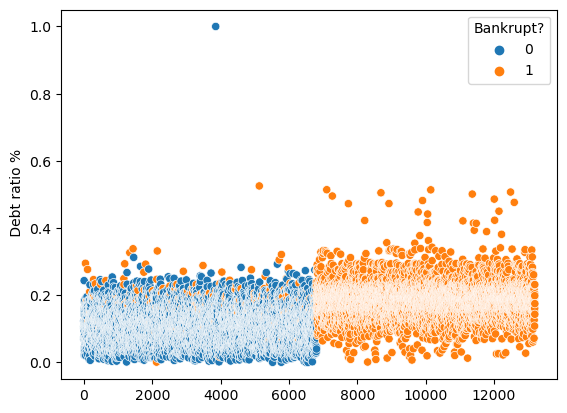

In [10]:
sns.scatterplot(data=SMData, x=SMData.index, y=' Debt ratio %', hue='Bankrupt?')
SMData.corr()

In [11]:
SMData.to_csv('SMData.csv')